# Быстрая гистограмма

In [79]:
def timer(number):
    def decorator(func):
        import time

        def wrapper(*args, **kwargs):
            result = 0
            for i in range(0, number):
                start = time.time()
                func(*args, **kwargs)
                end = time.time()
                result += end - start
            print("Method: ", func.__name__, ", Time:", result / number)
            return func(*args, **kwargs)

        return wrapper

    return decorator

In [80]:
from typing import List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np

@timer(100)
def fast_hist(arr: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param arr: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_val = min(arr)
    max_val = max(arr)
    step = (max_val - min_val) / bins
    bins_labels = [min_val + i * step for i in range(bins)]
    bins_labels.append(max_val)
    bins_values = [0] * bins
    for val in arr:
        for i in range(bins):
            if bins_labels[i] <= val < bins_labels[i + 1]:
                bins_values[i] += 1
            if i + 1 == len(bins_labels) - 1 and bins_labels[i + 1] == val:
                bins_values[i] += 1
    bins_labels = np.array(bins_labels).astype(float)
    bins_values = np.array(bins_values).astype(float)
    return bins_values, bins_labels

@timer(100)
def hist(arr, bins):
    return plt.hist(arr, bins=bins)

Method:  fast_hist , Time: 0.011084084510803222
Значения колонок: [2. 1. 1. 3. 1. 3. 2. 1. 3. 1. 2. 1. 2. 2. 2. 2. 0. 3. 1. 1. 2. 0. 5. 2.
 3. 0. 0. 1. 2. 2. 3. 1. 0. 0. 3. 1. 6. 4. 0. 2. 1. 1. 0. 2. 1. 2. 3. 1.
 0. 3. 1. 0. 0. 3. 0. 1. 1. 1. 2. 2. 3. 1.]
Названия колонок: [ 0.          1.58064516  3.16129032  4.74193548  6.32258065  7.90322581
  9.48387097 11.06451613 12.64516129 14.22580645 15.80645161 17.38709677
 18.96774194 20.5483871  22.12903226 23.70967742 25.29032258 26.87096774
 28.4516129  30.03225806 31.61290323 33.19354839 34.77419355 36.35483871
 37.93548387 39.51612903 41.09677419 42.67741935 44.25806452 45.83870968
 47.41935484 49.         50.58064516 52.16129032 53.74193548 55.32258065
 56.90322581 58.48387097 60.06451613 61.64516129 63.22580645 64.80645161
 66.38709677 67.96774194 69.5483871  71.12903226 72.70967742 74.29032258
 75.87096774 77.4516129  79.03225806 80.61290323 82.19354839 83.77419355
 85.35483871 86.93548387 88.51612903 90.09677419 91.67741935 93.25806

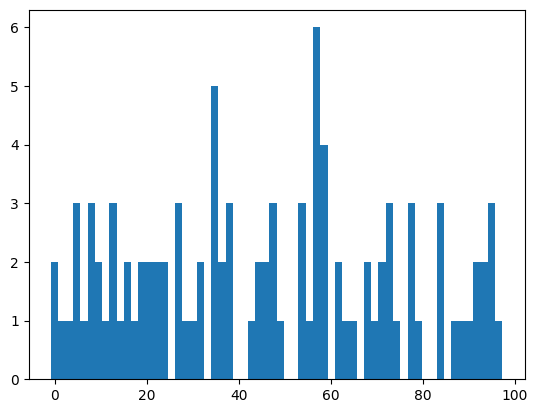

In [81]:
import numpy.random as rand

array = rand.randint(low=0, high=100, size=100)

value_counts, bins_names = fast_hist(array, bins=len(set(array)))

plt.bar(bins_names[:-1], value_counts, width=bins_names[1] - bins_names[0])

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

Method:  hist , Time: 0.042570078372955324
Значения колонок: [2. 1. 1. 3. 1. 3. 2. 1. 3. 1. 2. 1. 2. 2. 2. 2. 0. 3. 1. 1. 2. 0. 5. 2.
 3. 0. 0. 1. 2. 2. 3. 1. 0. 0. 3. 1. 6. 4. 0. 2. 1. 1. 0. 2. 1. 2. 3. 1.
 0. 3. 1. 0. 0. 3. 0. 1. 1. 1. 2. 2. 3. 1.]
Названия колонок: [ 0.          1.58064516  3.16129032  4.74193548  6.32258065  7.90322581
  9.48387097 11.06451613 12.64516129 14.22580645 15.80645161 17.38709677
 18.96774194 20.5483871  22.12903226 23.70967742 25.29032258 26.87096774
 28.4516129  30.03225806 31.61290323 33.19354839 34.77419355 36.35483871
 37.93548387 39.51612903 41.09677419 42.67741935 44.25806452 45.83870968
 47.41935484 49.         50.58064516 52.16129032 53.74193548 55.32258065
 56.90322581 58.48387097 60.06451613 61.64516129 63.22580645 64.80645161
 66.38709677 67.96774194 69.5483871  71.12903226 72.70967742 74.29032258
 75.87096774 77.4516129  79.03225806 80.61290323 82.19354839 83.77419355
 85.35483871 86.93548387 88.51612903 90.09677419 91.67741935 93.25806452
 

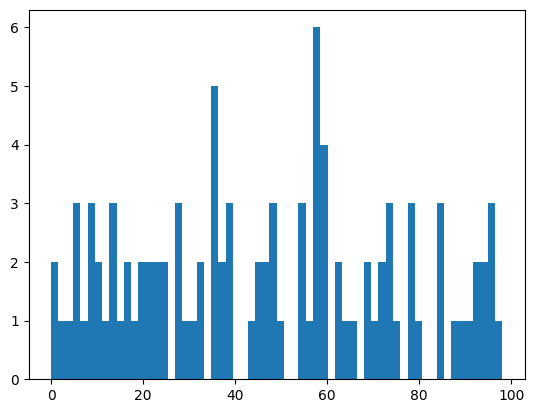

In [82]:
value_counts, bins_names, visual_figure = hist(array, bins=len(set(array)))
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)